Adrian deCola

Lab 0 Part D

PHYS 231

September 14, 2021

    Posted on Google you'll find a dataset in the form of a directory with 25 text files.

    Each of these text files is a different dataset of varying length of datapoints Y associated with an external parameter X (the value of X is given in the filename). X has units of kHz; Y has units of V.

    Write a script in Python (ideally a Colab Jupyter notebook) (and accompanying functions, if that makes your life easier) to do the following: make a graph with 25 points (axes Y vs X), with Y values at point X given by the mean of each set, with error bars that are the standard errors of the mean associated with a given set.


Mounted at /content/drive


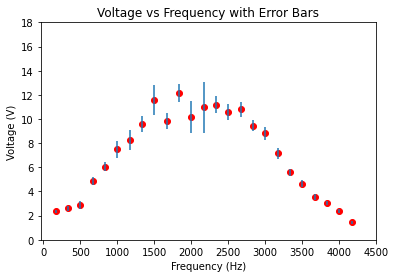

In [1]:
from google.colab import drive
import os
from matplotlib import pyplot as plt
import statistics as stats
import numpy as np

def read_file(path):
  # This function reads a text file like the ones we were given and returns 
  # a list of all the y values in it
  # the parameter path is the path to the text file to be read

  # initializing the list of y values
  y_vals = []

  # opening the file for reading
  with open(path, 'r') as f:
    
    #reading the first line
    y = f.readline()
    #reading each line until we reach the end of the document
    while y != "":

      #removing white space and converting to a floating point
      y = y.strip()
      y = float(y)

      y_vals.append(y)

      # reading the next line
      y = f.readline()
    
    # returning the list of voltages from the file
    return y_vals



def main():
  # You can sign into your google account just need the PHYS 231 | Student folder 
  # to be in your drive not wrapped in another directory.
  drive.mount('/content/drive')
  dir = "/content/drive/MyDrive/PHYS 231 | Student/L0_Data" 
  #dir = "/content/drive/MyDrive/Courses/231/F2021/PHYS 231 | Student/L0_Data" 


  x_list = []
  y_means = []
  y_errors = []

  for file in os.listdir(dir):

    # Getting the x value(in Hz) from the filename
    x = int(file.strip("blah").strip(".txt"))

    # Creating the the path file name
    path = f'{dir}/{file}'
    
    y_vals = read_file(path)

    y_mean = stats.mean(y_vals)
    # Takes the sample standard deviation for error bars
    y_se = stats.stdev(y_vals) / (len(y_vals))**(0.5)

    x_list.append(x)
    y_means.append(y_mean)
    y_errors.append(y_se)

  # Formatting plot
  plt.scatter(x_list, y_means, color = "r")
  plt.errorbar(x_list, y_means, yerr=y_errors, linestyle = '')
  plt.title("Voltage vs Frequency with Error Bars")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Voltage (V)")
  plt.xticks(np.arange(0, 4501, 500))
  plt.yticks(np.arange(0, 19, 2))

  # unmounting the drive
  drive.flush_and_unmount()


main()

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [7]:
drive.mount('/content/drive')
! ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [10]:
! ls drive/MyDrive/deCola

'C Lab'  'Lab 0'  'PHYS 231 Lab Notebook Adrian deCola.gdoc'   PreLabs
